# 안녕하세요:)

## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [4]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [6]:
stats.pearsonr(df_seoul_bus_station['정류장수'],df_seoul_bus_station['노선수'])

(0.25879843303095595, 0.2116069696436893)

In [5]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='자치구')

In [6]:
df=df.set_index('자치구')

In [8]:
df.head()

,계,남자,여자,65세이상고령자,부동산 중개 및 대리업 사업체수,두발미용업 사업체수,남녀용 겉옷 및 셔츠 도매업 사업체수,기타주점업 사업체수,일반 교과 학원 사업체수,"택시,용달 운송업 사업체수",...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),총 이동 시간(분),이동인구(평균),이동인구(합)
자치구,,,,,,,,,,,,,,,,,,,,,
종로구,153684,74018,79666,28064,549,261,400,537,110,833,...,349,106,5468935,5205394,131.889620,125.534028,21.349599,9356120,44.660701,19571837.56
중구,131450,63869,67581,24742,1152,678,21620,762,114,1060,...,178,103,3776675,3598932,121.020124,115.324511,21.012462,9306020,44.932366,19899691.04
용산구,236518,114571,121947,39461,1582,732,108,974,208,1742,...,323,67,4189977,4086474,137.891694,134.485421,21.364786,8514380,37.373125,14894087.30
성동구,291609,141662,149947,46896,1602,978,298,570,516,4544,...,435,58,2807280,2746738,96.377369,94.298888,21.740324,8887140,43.141640,17635698.46
광진구,353110,169525,183585,52604,1742,1492,178,1266,826,4174,...,269,41,2749448,2753411,118.352546,118.523137,22.474283,8625540,47.249420,18134138.44


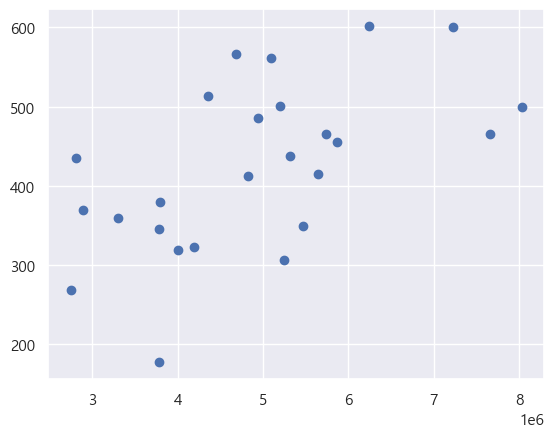

In [16]:
plt.scatter('승차총승객수','정류장수',data=df)

In [17]:
(df['정류장수']/df['승차총승객수']).sort_values(ascending=True)

자치구
중구      0.000047
동대문구    0.000058
관악구     0.000061
강남구     0.000062
종로구     0.000064
송파구     0.000074
용산구     0.000077
서대문구    0.000078
양천구     0.000080
영등포구    0.000081
동작구     0.000082
서초구     0.000083
강북구     0.000086
금천구     0.000091
은평구     0.000096
성북구     0.000097
광진구     0.000098
구로구     0.000098
중랑구     0.000100
도봉구     0.000109
마포구     0.000110
노원구     0.000118
강서구     0.000121
강동구     0.000128
성동구     0.000155
dtype: float64

In [5]:
import scipy.stats as stats

In [59]:
print(stats.pearsonr(df['정류장수'],df['승차승객']))
print(stats.pearsonr(df['정류장수'],df['계']))

(0.5666813370974586, 0.003141977397117319)
(0.5666148323603176, 0.0031462922429467965)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   계                     25 non-null     int64  
 1   남자                    25 non-null     int64  
 2   여자                    25 non-null     int64  
 3   65세이상고령자              25 non-null     int64  
 4   부동산 중개 및 대리업 사업체수     25 non-null     int64  
 5   두발미용업 사업체수            25 non-null     int64  
 6   남녀용 겉옷 및 셔츠 도매업 사업체수  25 non-null     int64  
 7   기타주점업 사업체수            25 non-null     int64  
 8   일반 교과 학원 사업체수         25 non-null     int64  
 9   택시,용달 운송업 사업체수        25 non-null     int64  
 10  한식 음식점,커피 전문점 사업체수    25 non-null     int64  
 11  등록업종총합                25 non-null     int64  
 12  정류장수                  25 non-null     int64  
 13  노선수                   25 non-null     int64  
 14  승차총승객수                25 non-null     int64  
 15  하차총승객수                25 no

Text(0.5, 1.0, '상관관계')

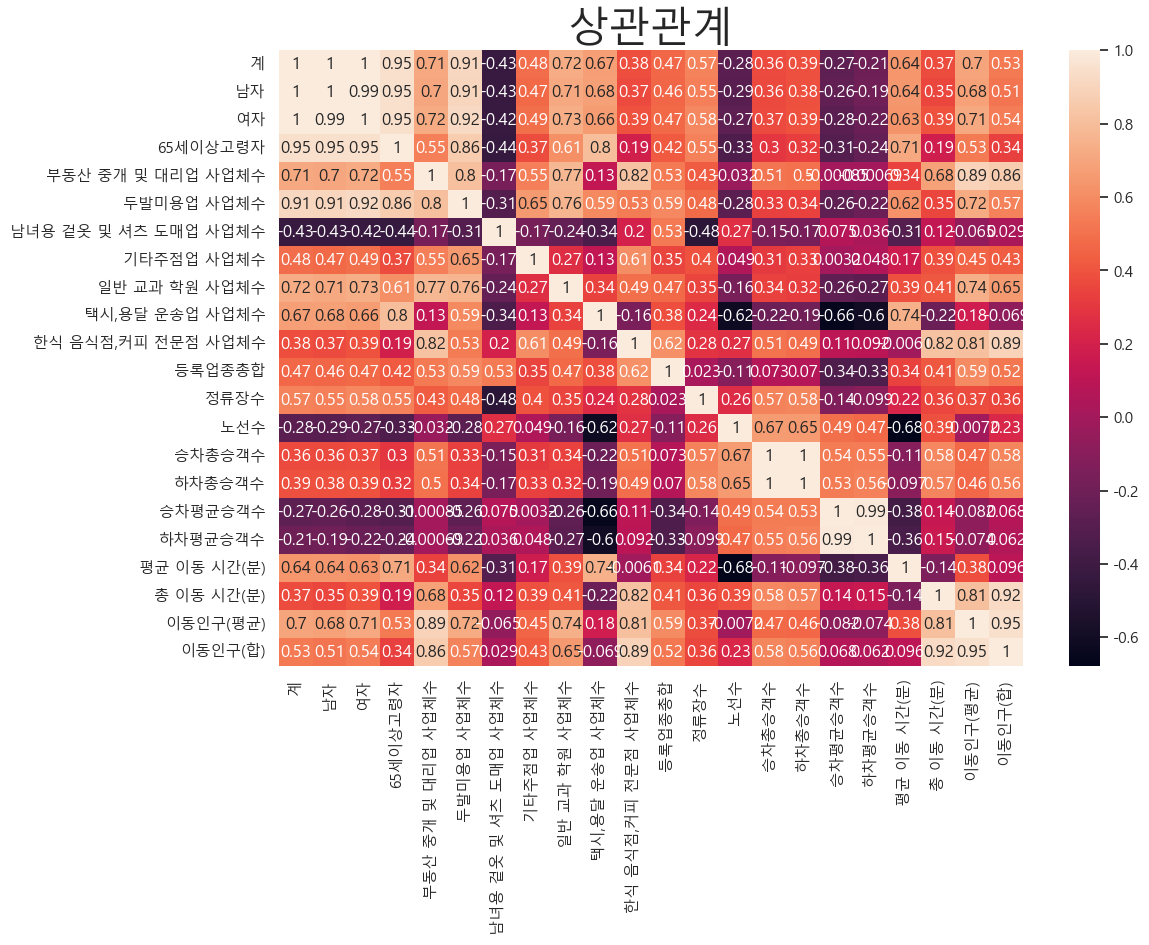

In [259]:
cor=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True)
plt.title('상관관계', size=30)

In [7]:
#df['승하차승객']=df['승차총승객수']+df['하차총승객수']
df.rename(columns={'승차총승객수':'승차승객'},inplace=True)
df.rename(columns={'65세이상고령자':'고령자'},inplace=True)

In [8]:
df=df[['승차승객','계','정류장수']]

In [9]:
a=pd.read_csv('area.csv')
b=pd.read_csv('commute.csv')
c=pd.read_csv('area_business.csv')

In [10]:
df=df.reset_index()

In [11]:
df.head()

,자치구,승차승객,계,정류장수
0,종로구,5468935,153684,349
1,중구,3776675,131450,178
2,용산구,4189977,236518,323
3,성동구,2807280,291609,435
4,광진구,2749448,353110,269


In [12]:
a.head()

,index,자치구,면적 (km²),정류장수
0,0,종로구,23.91,349
1,1,중구,9.96,178
2,2,용산구,21.87,323
3,3,성동구,16.86,435
4,4,광진구,17.06,269


In [13]:
a.rename(columns={'면적 (km²)':'면적'},inplace=True)

In [14]:
b.rename(columns={'총생활인구수':'출퇴근인구'},inplace=True)

In [15]:
b.head()

,자치구,출퇴근인구,승하차평균승객수,정류장수,노선수
0,강남구,840824.406677,250.139439,499,91
1,강동구,486254.380960,196.279259,369,21
2,강북구,277861.370098,261.811876,413,67
3,강서구,529865.120060,175.707071,566,49
4,관악구,455615.500532,312.269714,466,86


In [16]:
c.head()

,면적 (km²),등록업종총합,정류장수,노선수,면적대비등록업종
0,23.91,5623,349,106,235.173568
1,9.96,31186,178,103,3131.124498
2,21.87,8928,323,67,408.230453
3,16.86,12314,435,58,730.367734
4,17.06,13718,269,41,804.103165


In [17]:
c.rename(columns={'면적대비등록업종':'등록업종'},inplace=True)

In [18]:
df = pd.merge(a,df,how='inner', on='자치구')
df = pd.merge(b,df,how='inner', on='자치구')
df = pd.merge(c,df,how='inner', on='정류장수')

In [19]:
df=df[['자치구','정류장수','출퇴근인구','승차승객','면적','등록업종','계']]

In [20]:
df=df.set_index('자치구')

In [21]:
df.head()

,정류장수,출퇴근인구,승차승객,면적,등록업종,계
자치구,,,,,,
종로구,349,293713.087568,5468935,23.91,235.173568,153684
중구,178,282324.962360,3776675,9.96,3131.124498,131450
용산구,323,292761.182980,4189977,21.87,408.230453,236518
성동구,435,352859.019128,2807280,16.86,730.367734,291609
광진구,269,362877.895265,2749448,17.06,804.103165,353110


In [22]:
dfy=pd.DataFrame(df['정류장수'],columns=['정류장수'])
dfx=df.drop('정류장수',axis=1)

In [23]:
dfy.head()

,정류장수
자치구,
종로구,349
중구,178
용산구,323
성동구,435
광진구,269


In [24]:
dfx.head()

,출퇴근인구,승차승객,면적,등록업종,계
자치구,,,,,
종로구,293713.087568,5468935,23.91,235.173568,153684
중구,282324.962360,3776675,9.96,3131.124498,131450
용산구,292761.182980,4189977,21.87,408.230453,236518
성동구,352859.019128,2807280,16.86,730.367734,291609
광진구,362877.895265,2749448,17.06,804.103165,353110


In [25]:
df.head()

,정류장수,출퇴근인구,승차승객,면적,등록업종,계
자치구,,,,,,
종로구,349,293713.087568,5468935,23.91,235.173568,153684
중구,178,282324.962360,3776675,9.96,3131.124498,131450
용산구,323,292761.182980,4189977,21.87,408.230453,236518
성동구,435,352859.019128,2807280,16.86,730.367734,291609
광진구,269,362877.895265,2749448,17.06,804.103165,353110


In [50]:
cor=dfx.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True)
plt.title('상관관계', size=30)

NameError: name 'plt' is not defined

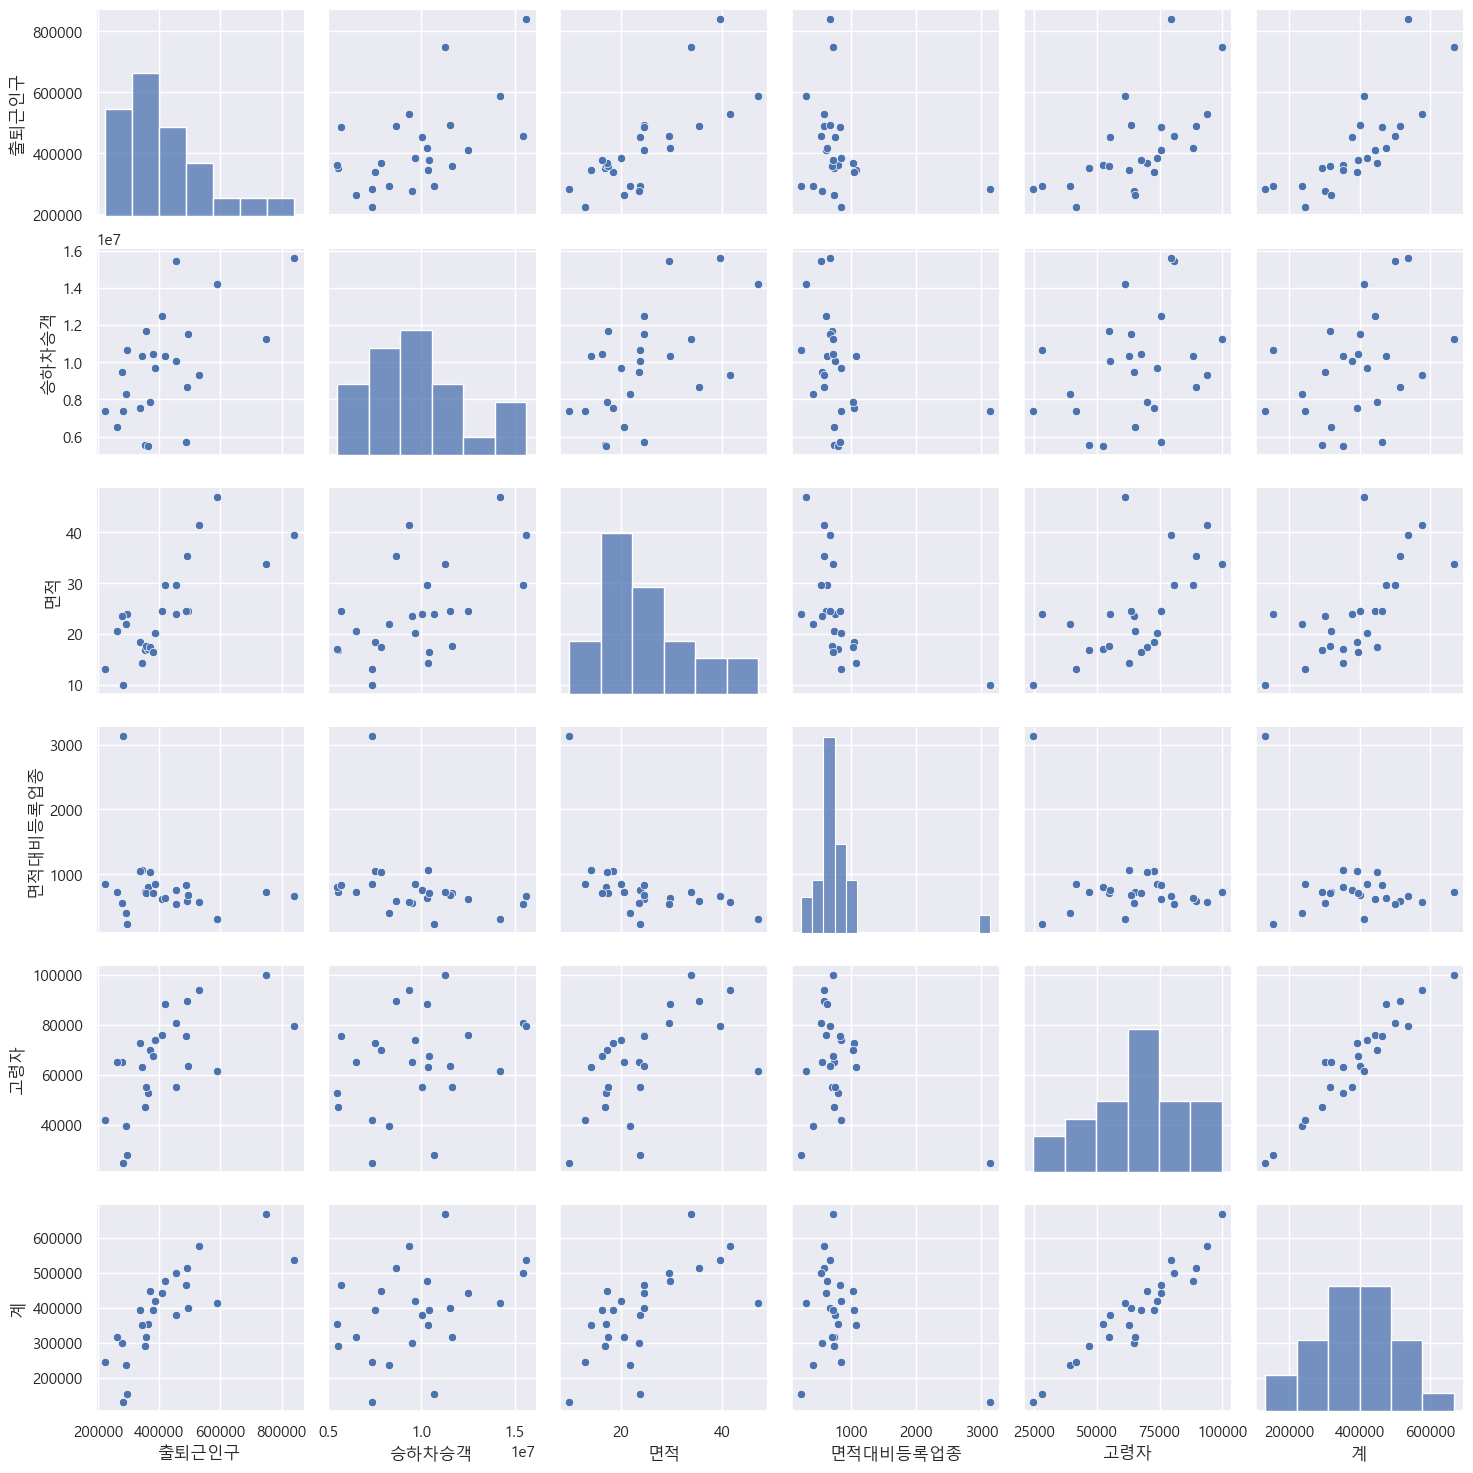

In [400]:
sns.pairplot(dfx)
plt.show()

In [26]:
import statsmodels.api as sm출퇴근인구+승차승객+면적+등록업종+계

In [41]:
model=sm.OLS.from_formula("정류장수 ~ 등록업종+면적",
                          data=df)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   정류장수   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     13.95
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           0.000123
Time:                        02:55:44   Log-Likelihood:                -141.38
No. Observations:                  25   AIC:                             288.8
Df Residuals:                      22   BIC:                             292.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    319.2140     64.097      4.980      0.0

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(dfx.values,i) for i in range(dfx.shape[1])]
vif['features']=dfx.columns
vif=vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,2.825119,등록업종
1,16.235784,승차승객
2,25.071059,계
3,25.114135,면적
4,40.701364,출퇴근인구


In [44]:
from patsy import dmatrix

In [45]:
formula="scale(출퇴근인구)+scale(승차승객)+scale(면적)+scale(등록업종)+scale(계)"
dfX=dmatrix(formula,dfx,return_type="dataframe")

In [46]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(dfX.values,i) for i in range(dfX.shape[1])]
vif['features']=dfX.columns
vif=vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.000000,Intercept
1,1.560863,scale(등록업종)
2,1.720902,scale(승차승객)
3,2.963377,scale(계)
4,3.370713,scale(면적)
5,4.775573,scale(출퇴근인구)


In [47]:
model2=sm.OLS.from_formula("정류장수 ~scale(면적)+scale(등록업종)",
                          data=df)
result2=model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   정류장수   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     13.95
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           0.000123
Time:                        02:56:34   Log-Likelihood:                -141.38
No. Observations:                  25   AIC:                             288.8
Df Residuals:                      22   BIC:                             292.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     424.6000     14.743     28.801      

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1

* 가설 2

* 가설 3

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [14]:
# 시각화, 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')       

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [15]:
import scipy.stats as stats

In [20]:
stats.pearsonr(df['정류장수'],df['노선수'])

(0.25879843303095595, 0.2116069696436893)

In [10]:
# 가설 1. 유동인구가 많으면 승하차총승객수가 많을 것이다.
df['승하차평균승객수']=df['승차평균승객수']+df['하차평균승객수']
stats.pearsonr(df['이동인구(평균)'],df['승하차평균승객수'])
# P > 0.05로 무의미
# 이동할 때 반드시 버스를 타진 않음

(-0.07818711672032007, 0.7102721090556059)

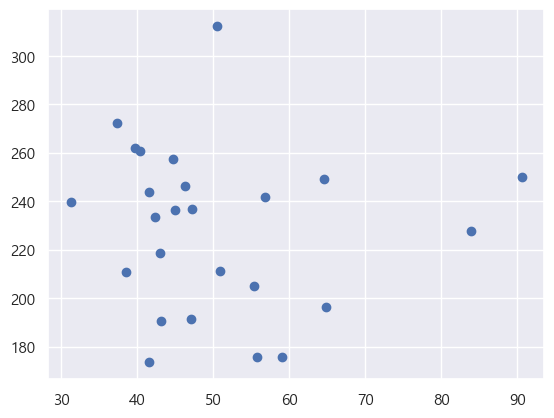

In [11]:
plt.scatter('이동인구(평균)','승하차평균승객수',data=df)

In [12]:
# 가설 2. 평균이동인구의 비율이 높을수록 정류장 수가 많다.
df['유동인구비율']=df['이동인구(평균)']/df['계']

print(stats.pearsonr(df['정류장수'],df['유동인구비율']))
print(stats.pearsonr(df['노선수'],df['유동인구비율']))
# P < 0.05로 유의미, 상관관계 (-)로 음의 상관관계.

(-0.46124393712970757, 0.020301235449483028)
(0.41317961468888287, 0.04008299905079313)


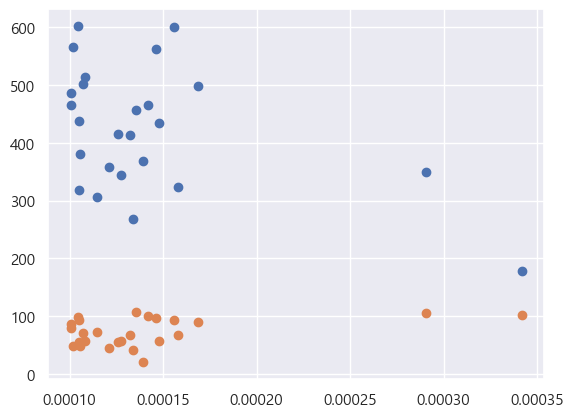

In [13]:
plt.scatter('유동인구비율','정류장수',data=df)
plt.scatter('유동인구비율','노선수',data=df)

In [17]:
(df['정류장수']/df['유동인구비율']).sort_values(ascending=True)

자치구
중구      5.207404e+05
종로구     1.200960e+06
광진구     2.010323e+06
용산구     2.044124e+06
강동구     2.646100e+06
동대문구    2.669432e+06
금천구     2.703113e+06
성동구     2.940313e+06
강남구     2.960148e+06
도봉구     2.965701e+06
양천구     3.042410e+06
강북구     3.127909e+06
영등포구    3.275788e+06
송파구     3.304093e+06
서대문구    3.368687e+06
중랑구     3.595897e+06
서초구     3.845320e+06
마포구     3.848074e+06
동작구     4.165181e+06
관악구     4.623410e+06
은평구     4.687936e+06
노원구     4.745881e+06
구로구     4.828971e+06
강서구     5.551597e+06
성북구     5.755627e+06
dtype: float64

In [14]:
(df['노선수']/df['유동인구비율']).sort_values(ascending=True)

자치구
강동구     150591.082272
중구      301327.334947
광진구     306406.088513
종로구     364761.495084
도봉구     380006.223350
성동구     392041.702390
용산구     424013.404430
송파구     437891.898366
중랑구     454218.544904
금천구     454436.457060
강서구     480615.287614
강북구     507433.236831
노원구     526294.169802
양천구     534090.740477
강남구     539826.574059
서초구     596024.572504
동대문구    636825.270926
마포구     664169.421311
은평구     664358.184308
영등포구    711515.347420
구로구     784956.252464
서대문구    790459.396751
관악구     853247.269549
동작구     893897.358639
성북구     946523.294879
dtype: float64

In [16]:
# 가설 3. 승하차평균승객수의 비율이 높을수록 정류장 수가 많다.

df['승하차평균승객비율']=df['승하차평균승객수']/df['계']

print(stats.pearsonr(df['정류장수'],df['승하차평균승객비율']))
print(stats.pearsonr(df['노선수'],df['승하차평균승객비율']))
# P < 0.05로 유의미, 상관관계 (-)로 음의 상관관계.

(-0.5901987601440951, 0.0018986453942342037)
(0.4105905129303671, 0.0414745180467)


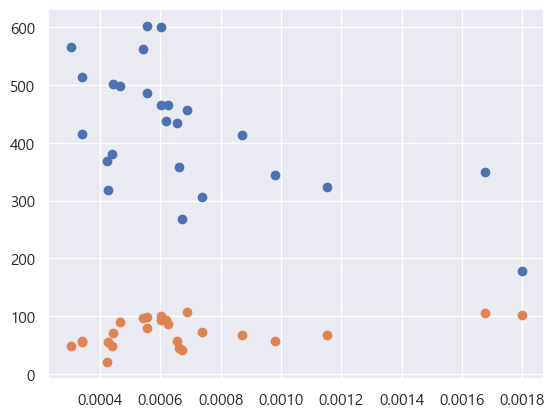

In [17]:
plt.scatter('승하차평균승객비율','정류장수',data=df)
plt.scatter('승하차평균승객비율','노선수',data=df)

In [30]:
(df['정류장수']/df['승하차평균승객비율']).sort_values(ascending=True)

자치구
중구      9.899992e+04
종로구     2.083558e+05
용산구     2.804763e+05
금천구     3.522658e+05
광진구     4.009976e+05
동대문구    4.141240e+05
강북구     4.745404e+05
도봉구     5.419546e+05
서대문구    6.614744e+05
성동구     6.652633e+05
동작구     7.088125e+05
관악구     7.466513e+05
양천구     7.489335e+05
영등포구    7.703816e+05
중랑구     8.614769e+05
강동구     8.743705e+05
구로구     8.746079e+05
서초구     9.963887e+05
마포구     1.037274e+06
강남구     1.071929e+06
성북구     1.081542e+06
은평구     1.129333e+06
송파구     1.217605e+06
노원구     1.504795e+06
강서구     1.863267e+06
dtype: float64

In [18]:
(df['노선수']/df['승하차평균승객비율']).sort_values(ascending=True)

자치구
강동구      49760.922554
중구       57286.470856
용산구      58179.285846
금천구      59221.502201
광진구      61118.599406
종로구      63282.857298
도봉구      69442.646483
강북구      76983.551269
성동구      88701.772882
동대문구     98794.286333
중랑구     108818.132641
양천구     131474.227796
관악구     137794.009890
구로구     142168.774792
동작구     152119.588122
서초구     154440.242672
서대문구    155214.393846
은평구     160045.149001
강서구     161307.532569
송파구     161369.399742
노원구     166874.202809
영등포구    167330.194101
성북구     177861.524212
마포구     179031.290946
강남구     195482.000413
dtype: float64

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(seoul_bus_station.corr(), annot = True)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?